In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, binom, norm
import scipy.stats as stats

# Autoreload of the files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/16_05_2025", exist_ok=True)

# PCA
***

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


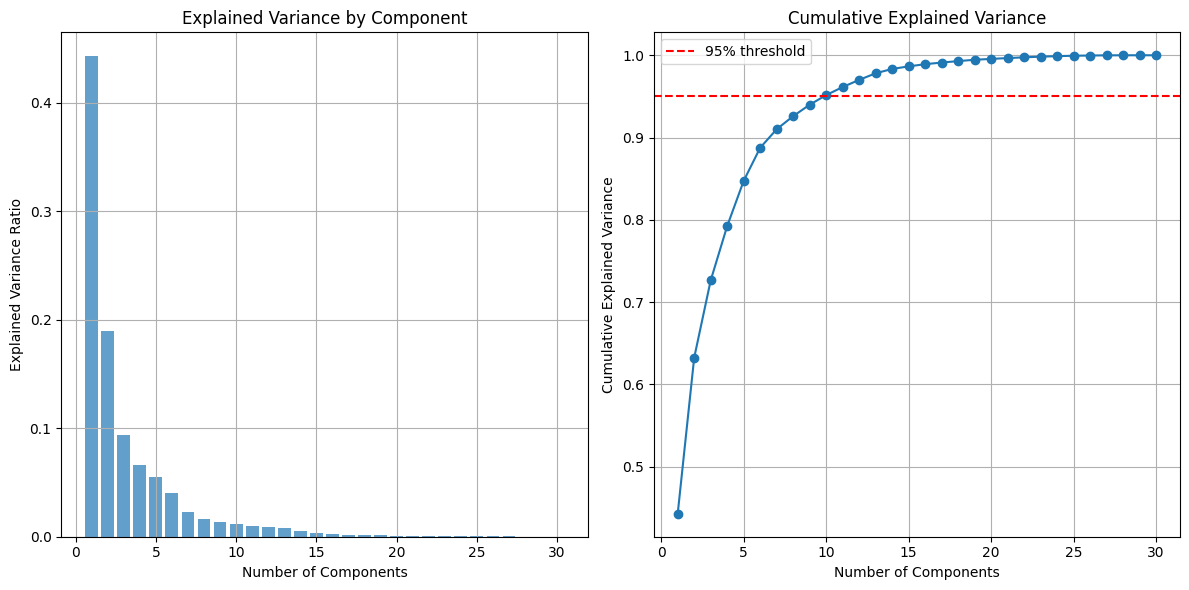

Number of components needed to explain 95% variance: 10
Number of components needed to explain 99% variance: 17


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load and preprocess data
data = load_breast_cancer()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA with all components
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(12, 6))

# Plot individual explained variance
plt.subplot(121)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

# Plot cumulative explained variance
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.legend()

plt.tight_layout()
plt.savefig(f'{path}/slides_images/16_05_2025/pca_explained_variance.png')
plt.show()

# Find the number of components needed to explain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {n_components_95}")

# Find the number of components needed to explain 99% variance
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
print(f"Number of components needed to explain 99% variance: {n_components_99}")

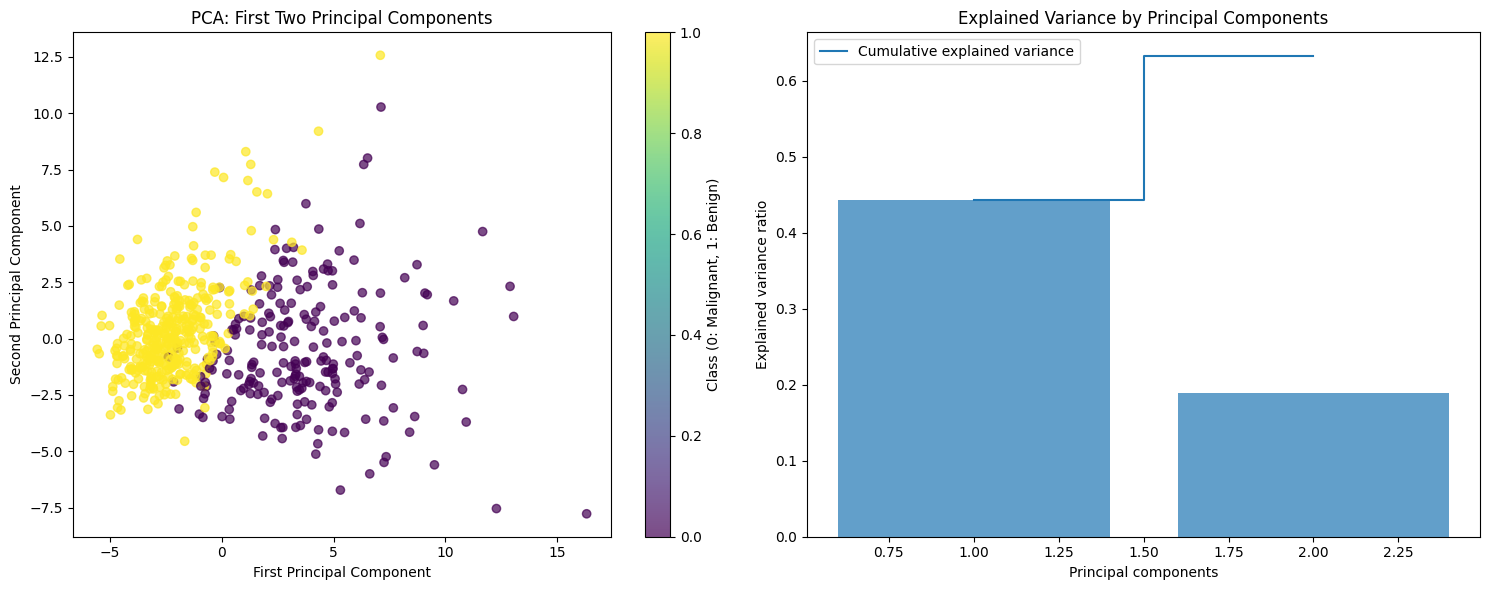

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot 1: Scatter plot of the first two principal components
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.colorbar(scatter, label='Class (0: Malignant, 1: Benign)')

# Plot 2: Explained variance ratio
plt.subplot(1, 2, 2)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

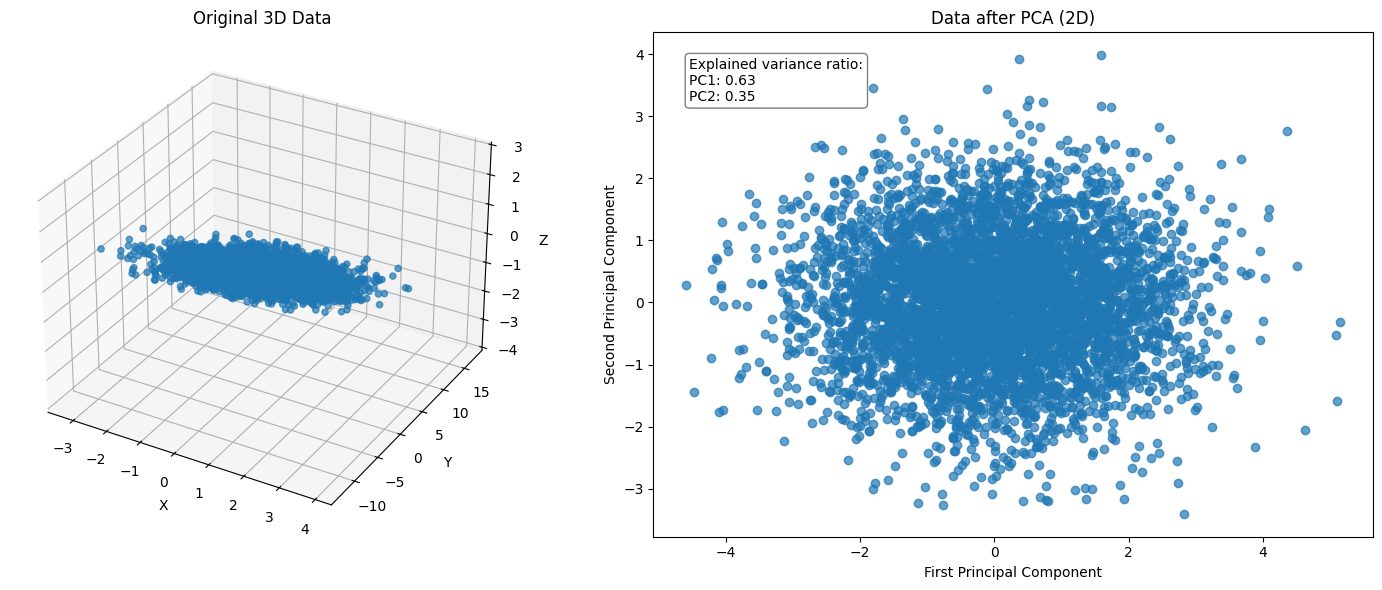

Principal components (rows are components, columns are original features):
[[ 0.08669684 -0.69589924  0.71288702]
 [ 0.96389043  0.23945229  0.11652395]]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Create a 3D dataset that roughly lies on a 2D plane
n_samples = 5000
x = np.random.normal(0, 1, n_samples)
y = 0.5 * x + np.random.normal(3, 4, n_samples)  # y is somewhat dependent on x
z = 0.3 * x - 0.2 * y + np.random.normal(0, 0.3, n_samples)  # z is a linear combination of x and y

# Combine into a 3D dataset
X = np.column_stack((x, y, z))

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create figure
plt.figure(figsize=(15, 6))

# 3D plot
ax1 = plt.subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.7)
ax1.set_title('Original 3D Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# 2D PCA plot
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('Data after PCA (2D)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add explained variance ratio to the plot
explained_var = pca.explained_variance_ratio_
plt.text(0.05, 0.95, f"Explained variance ratio:\nPC1: {explained_var[0]:.2f}\nPC2: {explained_var[1]:.2f}",
         transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

# Print the principal components
print("Principal components (rows are components, columns are original features):")
print(pca.components_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create figure with two subplots
fig = plt.figure(figsize=(16, 8))

# 3D subplot
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.7, color='darkblue')
ax1.set_title('Original 3D Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# 2D PCA subplot
ax2 = fig.add_subplot(122)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='darkblue')
ax2.set_title('PCA Projection (2D)')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.grid(True, alpha = 0.3)

# Add explained variance ratio
explained_var = pca.explained_variance_ratio_
ax2.text(0.02, 0.98, 
         f"Explained variance:\nPC1: {explained_var[0]:.2f}\nPC2: {explained_var[1]:.2f}",
         transform=ax2.transAxes, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Animation update function
def update(frame):
    ax1.view_init(elev=20, azim=frame)
    return scatter,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), 
                    interval=50, blit=False)

# Display the animation
plt.close()  # Prevents the static plot from showing
HTML(ani.to_html5_video())
# ani.save('pca_animation.mp4', writer='ffmpeg', fps=10)

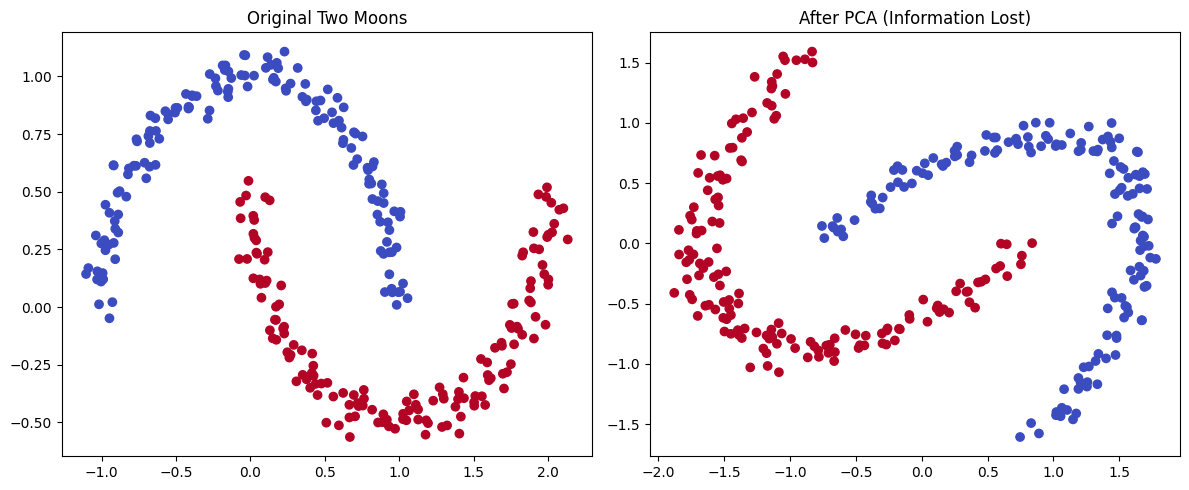

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Generate nonlinear data
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# 2. Standardize
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply PCA (keep 2 components just to visualize the space)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original non-linear shape
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
axs[0].set_title("Original Two Moons")

# PCA-transformed
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm")
axs[1].set_title("After PCA (Information Lost)")

plt.tight_layout()
plt.savefig(f'{path}/slides_images/16_05_2025/pca_nonlinear.png')
plt.show()